# Bottlenecks

In [ ]:
import numpy as np

Dot function in i->j->k order

In [ ]:
def dot(a,b):
  c=np.zeros((a.shape[0],b.shape[1]))
  for i in range(a.shape[0]):
    for j in range(b.shape[1]):
      for k in range(a.shape[1]):
        c[i,j]+=a[i,k]*b[k,j]
  return c

Take 2 small matrices A and B and see how long the above function takes

In [ ]:
n=256
a =np.random.random((n,n))
b =np.random.random((n,n))

In [ ]:
t_dot=%timeit -o dot(a,b)

13.3 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Matrix multiplication of two n by n matrices performs $2n^3$ operations.

In [ ]:
t_dot.best

13.03830647899997

In [ ]:
print("%.3f GFLOP/s" % (2*n**3/t_dot.best*1e-9))

0.003 GFLOP/s


Numba usage for the dot fn gives better results

In [ ]:
from numba import jit
jdot=jit(dot)

In [ ]:
t_jit=%timeit -o jdot(a,b)

24.8 ms ± 601 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
t_jit.best

0.02448171400010324

In [ ]:
print("%.3f GFLOP/s" % (2*n**3/t_jit.best*1e-9))

1.371 GFLOP/s


Access order and make the dot fn in i->k->j order

In [ ]:
@jit
def dot2(a,b):
  c=np.zeros((a.shape[0],b.shape[1]))
  for i in range(a.shape[0]):
    for k in range(a.shape[1]):
      for j in range(b.shape[1]):
        c[i,j]+=a[i,k]*b[k,j]
  return c

In [ ]:
t_dot2=%timeit -o dot2(a,b)

5.19 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(2*n**3/t_dot2.best*1e-9, " GFLOP/s")

6.606058816221791  GFLOP/s


Now, for n=2048

In [ ]:
n=2048
a =np.random.random((n,n))
b =np.random.random((n,n))

In [ ]:
t_dot2_large=%timeit -o dot2(a,b)

5.51 s ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(2*n**3/t_dot2_large.best*1e-9, " GFLOP/s")

3.310621084573096  GFLOP/s


Using numpy.dot()

In [ ]:
t_numpy=%timeit -o np.dot(a,b)

807 ms ± 333 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(2*n**3/t_numpy.best*1e-9, " GFLOP/s")

35.78644143894247  GFLOP/s


# Intro to IPython and Jupyter notebooks



In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

Timing with %timeit

In [ ]:
#Using random
%%timeit
import random
n=1
[random.uniform(0,1) for i in range(n)]

690 ns ± 76 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# Using np.random
n=1
t=%timeit -o [np.random.uniform(0,1) for i in range(n)]

2.81 µs ± 90.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Plotting

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','svg')

<ipython-input-29-feb98fb00313>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf','svg')


Some Introspection

In [ ]:
%who

a	 b	 dot	 dot2	 jdot	 jit	 n	 np	 numpy	 
plt	 random	 set_matplotlib_formats	 t	 t_dot	 t_dot2	 t_dot2_large	 t_jit	 t_numpy	 



In [ ]:
%whos

Variable                 Type             Data/Info
---------------------------------------------------
a                        ndarray          2048x2048: 4194304 elems, type `float64`, 33554432 bytes (32.0 Mb)
b                        ndarray          2048x2048: 4194304 elems, type `float64`, 33554432 bytes (32.0 Mb)
dot                      function         <function dot at 0x7cfebe03ae60>
dot2                     CPUDispatcher    CPUDispatcher(<function dot2 at 0x7cfeb03a2dd0>)
jdot                     CPUDispatcher    CPUDispatcher(<function dot at 0x7cfebe03ae60>)
jit                      function         <function jit at 0x7cfeb70d9240>
n                        int              1
np                       module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
numpy                    module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                      module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
random   

# Numpy Intro

In [ ]:
import numpy as np
print(np.__version__)
print(np.show_config())

1.26.4
Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /usr/local/include
    lib directory: /usr/local/lib
    name: openblas64
    openblas configuration: USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= HASWELL MAX_THREADS=2
    pc file directory: /usr/local/lib/pkgconfig
    version: 0.3.23.dev
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep139863411681952
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -fno-strict-aliasing
    commands: cc
    linker: ld.bfd
    linker args: -Wl,--strip-debug, -fno-strict-aliasing
    name: gcc
    version: 10.2.1
  c++:
    commands: c++
    linker: ld.bfd
    linker args: -Wl,--strip-debug
    name: gcc
    version: 10.2.1
  cython:
    commands: cython
    linker: cython
    name: cython
   

Creation, Type

In [ ]:
a=np.array([[1,2,3,4],[5,6,7,8]])
b=np.zeros(5)
c=np.arange(10,20,3)
d=np.linspace(0+0j, 10+10j, 11)
e=np.ones(10, dtype='bool')
for i in [a,b,c,d,e]:
  print(i.dtype)
  print(i)
  print()

int64
[[1 2 3 4]
 [5 6 7 8]]

float64
[0. 0. 0. 0. 0.]

int64
[10 13 16 19]

complex128
[ 0. +0.j  1. +1.j  2. +2.j  3. +3.j  4. +4.j  5. +5.j  6. +6.j  7. +7.j
  8. +8.j  9. +9.j 10.+10.j]

bool
[ True  True  True  True  True  True  True  True  True  True]



In [ ]:
a=np.array([[1,2,3],[4,5,6]])
print(a)
print("type:", a.dtype)
print("shape:",a.shape)
print("dim:",a.ndim)
print("size:",a.size)
print("itemsize:",a.itemsize)
print("nbytes:",a.nbytes)
print("flags:",a.flags)

[[1 2 3]
 [4 5 6]]
type: int64
shape: (2, 3)
dim: 2
size: 6
itemsize: 8
nbytes: 48
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



Complex numbers

In [ ]:
a= np.array([1+1j, 2, 3-2j])
a.conj(), np.angle(a)

(array([1.-1.j, 2.-0.j, 3.+2.j]),
 array([ 0.78539816,  0.        , -0.5880026 ]))

In [ ]:
b=np.array([1,2,3,4])
print(b.real, b.imag)

[1 2 3 4] [0 0 0 0]


Casting

In [ ]:
a=np.array([[129,128,127],[226,125,124.9]], dtype='int8')
a

<ipython-input-6-14db4e4ad999>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 129 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  a=np.array([[129,128,127],[226,125,124.9]], dtype='int8')
<ipython-input-6-14db4e4ad999>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 128 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  a=np.array([[129,128,127],[226,125,124.9]], dtype='int8')
<ipython-input-6-14db4e4ad999>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 226 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype

array([[-127, -128,  127],
       [ -30,  125,  124]], dtype=int8)

NDArrays: Read Access

In [ ]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[2,-1] #tuple indexing in 1 square bracket

9

In [ ]:
a[:,::2] #every second column (gap of 2)

array([[1, 3],
       [4, 6],
       [7, 9]])

Fancy Indexing

In [ ]:
a=np.arange(0,77,7)
a[[1,3,8]]

array([ 7, 21, 56])

In [ ]:
a[a%3==0]

array([ 0, 21, 42, 63])

In [ ]:
mask=np.array([0,1,0,1,0,0,0,0,1,0,0], dtype=bool)
a[mask]

array([ 7, 21, 56])

In [ ]:
a

array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63, 70])

In [ ]:
div_by_three=np.where(a%3==0)
print(div_by_three)#returns the indices
a[div_by_three]#returns the values (fancy indexing)

(array([0, 3, 6, 9]),)


array([ 0, 21, 42, 63])

In [ ]:
a=np.array([[1,2,3],[4,5,6]])
a[1,1:]=0
a

array([[1, 2, 3],
       [4, 0, 0]])

In [ ]:
a.transpose()

array([[1, 4],
       [2, 0],
       [3, 0]])

In [ ]:
a.flatten()

array([1, 2, 3, 4, 0, 0])

In [ ]:
a.ravel()

array([1, 2, 3, 4, 0, 0])

In [ ]:
a.swapaxes(0,1)#works like transpose in this case atleast

array([[1, 4],
       [2, 0],
       [3, 0]])

Elementwise Operations (UNFUNCS)

In [ ]:
l=range(1000000) #python
%timeit [i+1 for i in l]

75 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
a=np.arange(1000000) #NumPy
%timeit a+1

685 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Broadcasting

In [ ]:
a=np.array([[4,2,6],[1,2,3]])
b=np.array([1,5,3]) # will be broadcasted to a 2-d array
np.maximum(a,b)

array([[4, 5, 6],
       [1, 5, 3]])

Collective Methods

In [ ]:
a

array([[4, 2, 6],
       [1, 2, 3]])

In [ ]:
np.add.reduce(a)

array([5, 4, 9])

In [ ]:
np.add.accumulate(a)

array([[4, 2, 6],
       [5, 4, 9]])

# Think Vector

Dot Product

In [ ]:
s=0
v=np.array([1,2,3])
w=np.array([4,5,6])
for i in range(len(v)):
  s+=v[i]*w[i]
s

32

Map

In [ ]:
vw=np.array([v[i]*w[i] for i in range(len(v))])
print(vw)
# Now let's reduce
s=0
for i in range(len(v)):
  s+=vw[i]
s


[ 4 10 18]


32

Map-Reduce Using Numpy

In [ ]:
#Map
vw=v*w
#Reduce
s=vw.sum()
print(s)

32


In [ ]:
#Everything in one call
s=v.dot(w)
s

32

A system with Fixed Boundaries

In [ ]:
A_orig=np.random.random((10,10))
A_orig[:,0]=0
A_orig[:,-1]=1
print(A_orig)

[[0.         0.74167018 0.02872587 0.97897976 0.39861776 0.66331336
  0.58418858 0.79771933 0.85313834 1.        ]
 [0.         0.80482152 0.89343284 0.28836032 0.40869868 0.86469819
  0.08614839 0.91985585 0.16999509 1.        ]
 [0.         0.61604818 0.3281916  0.896986   0.18905067 0.31086992
  0.9525714  0.66250385 0.02238531 1.        ]
 [0.         0.72433861 0.68634187 0.26147863 0.16329857 0.63385718
  0.9095177  0.21840778 0.21360069 1.        ]
 [0.         0.38916258 0.15423901 0.10256079 0.87080458 0.57417469
  0.35053486 0.44341129 0.28328037 1.        ]
 [0.         0.54856843 0.63078204 0.82617741 0.40121342 0.04083861
  0.94234574 0.26495008 0.92064011 1.        ]
 [0.         0.26126715 0.2582775  0.41518539 0.28761485 0.97558422
  0.56996007 0.76472507 0.10438236 1.        ]
 [0.         0.68946583 0.59200971 0.66735412 0.7619375  0.1225606
  0.22571284 0.04045521 0.59227619 1.        ]
 [0.         0.09686398 0.93620076 0.43002946 0.91042012 0.70440438
  0.40996703 

Explixit Nested For Loop

In [ ]:
A=A_orig.copy()
B=np.random.random((10,10))
B[:,0]=0
B[:,-1]=1
for i in range(A.shape[0]):
  for j in range(1,A.shape[1]-1):
    B[i,j]=0.25*(A[(i+1)%A.shape[0],j]+A[i-1,j]+A[i,(j+1)]+A[i,j-1])

|A-B|=3.365


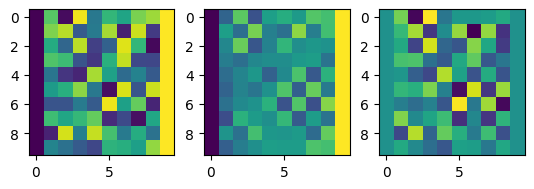

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.imshow(A, interpolation='nearest')
plt.subplot(1,3,2)
plt.imshow(B, interpolation='nearest')
plt.subplot(1,3,3)
plt.imshow(A-B, interpolation='nearest')
print('|A-B|=%.3f'%np.linalg.norm(A-B))

Elementwise Operation

In [ ]:
B=0.25*(np.roll(A,1,axis=0)+np.roll(A,-1,axis=0)+np.roll(A,1,axis=1)+np.roll(A,-1,axis=1))
B[:,0]=0
B[:,-1]=1

|A-B|=3.365


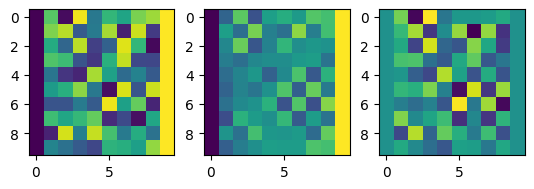

In [ ]:
plt.subplot(1,3,1)
plt.imshow(A, interpolation='nearest')
plt.subplot(1,3,2)
plt.imshow(B, interpolation='nearest')
plt.subplot(1,3,3)
plt.imshow(A-B, interpolation='nearest')
print('|A-B|=%.3f'%np.linalg.norm(A-B))

Programming Exercise MandelBrot & Escape Algorithm

In [ ]:
def escape_time(p,maxtime):
  """Perform the Mandelbrot iteration until it's clear the p diverges ot the maximum number of iterations has been reaches.

  Parameters
  ----------
  p : complex
    The complex number to iterate.
  maxtime : int
    The maximum number of iterations to perform before p is considered in the Mandelbort set
  """

  z=0j #Complex number in Python
  for time in range(maxtime):
    z=z**2+p
    if abs(z)>2:
      return time
  return maxtime

# Profiling

Profiling a simple Particle Dynamics Code

In [ ]:
#Intialization

#1000 particles
n=1000
#time step of 0.01
dt=0.01

#Intialize coordinates and velocities to random values
x=np.random.random(n)
y=np.random.random(n)
z=np.random.random(n)
vx=np.zeros_like(x)
vy=np.zeros_like(y)
vz=np.zeros_like(z)
m=np.ones_like(x)

In [ ]:
G = 6.67430e-11  # Gravitational constant
def calculate_all_forces(x, y, z, m):
    n = len(x)
    fx = np.zeros(n)
    fy = np.zeros(n)
    fz = np.zeros(n)

    for i in range(n):
        for j in range(i+1, n):
            dx = x[j] - x[i]
            dy = y[j] - y[i]
            dz = z[j] - z[i]
            r = np.sqrt(dx**2 + dy**2 + dz**2)
            if r != 0:  # Prevent division by zero
                F = G * m[i] * m[j] / r**2
                fx[i] += F * dx / r
                fy[i] += F * dy / r
                fz[i] += F * dz / r
                fx[j] -= F * dx / r
                fy[j] -= F * dy / r
                fz[j] -= F * dz / r

    return np.array([fx, fy, fz])

def propagate_all_variables(x, y, z, vx, vy, vz, m, f, dt):
    fx, fy, fz = f

    # Update velocities
    vx += fx * dt / m
    vy += fy * dt / m
    vz += fz * dt / m

    # Update positions
    x += vx * dt
    y += vy * dt
    z += vz * dt


In [ ]:
#The Algorithm

nsteps=2
def main():
    for i in range(nsteps):
        f = calculate_all_forces(x, y, z, m)
        propagate_all_variables(x, y, z, vx, vy, vz, m, f, dt)

In [ ]:
# Baseline

%%timeit nsteps=1
for i in range(nsteps):
  f=calculate_all_forces(x,y,z,m)
  propagate_all_variables(x,y,z,vx,vy,vz,m,f,dt)

3.07 s ± 499 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Profiling with %%PRUN

%prun -s cumulative main()

In [ ]:
# Line by Line Profiling

!pip install line_profiler


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f calculate_all_forces main()

In [ ]:
%%timeit x0=x[0]; y0=y[0]; z0=z[0]; x1=x[1]; y1=y[1]; z1=z[1];
(x1 - x0)

75.8 ns ± 1.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
%%timeit x0=x[0]; y0=y[0]; z0=z[0]; x1=x[1]; y1=y[1]; z1=z[1];
(x1 - x0) ** 2

208 ns ± 32.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
%%timeit x0=x[0]; y0=y[0]; z0=z[0]; x1=x[1]; y1=y[1]; z1=z[1];
(x1 - x0) * (x1 - x0)

215 ns ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit x0=x[0]; y0=y[0]; z0=z[0]; x1=x[1]; y1=y[1]; z1=z[1];
dx= (x1 - x0)
dx * dx

169 ns ± 45.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Debugging Python

PDB

In [ ]:
#%%write file buggy.py
def imabuggyincrement(i,a):
  """ Increment a[i] by 1"""
  if ii< len(a):
    a[i]+=1;

a= list(range(10))
ii=4
imabuggyincrement(10,a)

IndexError: list index out of range

In [ ]:
%debug

> <ipython-input-52-7b8b6768c7ed>(5)imabuggyincrement()
      3   """ Increment a[i] by 1"""
      4   if ii< len(a):
----> 5     a[i]+=1;
      6 
      7 a= list(range(10))




PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 361, in set_quit
    sys.settrace(None)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/debugger.py", line 1075, in cmdloop
    sys.settrace(None)



--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


In [ ]:
def imabuggyincrement(i,a):
  """ Increment a[i] by 1"""
  try:
    a[i]+=1;
  except IndexError:
    pass

def main(arg=[]):
  a= list(range(10))
  ii=4
  imabuggyincrement(10,a)

if __name__=='__main__':
  main()

# Speeding up your code with Cython

In [ ]:
%load_ext Cython

In [ ]:
def pydot(v,w):
    if len(v)==len(w) and len(v)>0:
        res=v[0]*w[0]
        for i in range(1,len(v)):
            res+=v[i]*w[i]
    return res

In [ ]:
%%cython -a # annotate
def dot(v,w):
    if len(v)==len(w) and len(v)>0:
        res=v[0]*w[0]
        for i in range(1,len(v)):
            res+=v[i]*w[i]
    return res

In [ ]:
# Declaring types
%%cython -a
import numpy as np
cimport numpy as np
def dot(np.ndarray[np.int_t,ndim=1] v, np.ndarray[np.int_t,ndim=1] w):
    cdef long res=0
    cdef int n=0
    n=len(v)
    if n==len(w) and n>0:
        for i in range(0,n):
            res+=v[i]*w[i]
    return res

Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_13dbf701e3defcfe0f595f237ef397d8695743a8.c:1250:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

In [ ]:
# Skipping Checks
%%cython -a
import numpy as np
cimport numpy as np
cimport cython
@cython.boundscheck(False)
def dot(np.ndarray[np.int64_t,ndim=1] v, np.ndarray[np.int64_t,ndim=1] w):
    cdef long res
    cdef int i
    cdef int n
    n=len(v)
    if n==len(w) and n>0:
        res=v[0]*w[0]
        for i in range(1,n):
            res+=v[i]*w[i]
    return res

Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_13ce7850f7979da65800cacb2a3b1a8c107073e2.c:1251:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/root/.cache/ipython/cython/_cython_magic_13ce7850f7979da65800cacb2a3b1a8c107073e2.c: In function ‘__pyx_pw_54_cython_magic_13ce7850f7979da65800cacb2a3b1a8c107073e2_1dot’:
/root/.cache/ipython/cython/_cython_magic_13ce7850f7979da65800cacb2a3b1a8

In [ ]:
# Wraparound and compile-args
%%cython  --compile-args=-O2 --compile-args=-march=native --force
import numpy as np
cimport numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def dot(np.ndarray[np.int64_t,ndim=1] v, np.ndarray[np.int64_t,ndim=1] w):
    cdef long res
    cdef int i
    cdef int n
    n=len(v)
    if n==len(w) and n>0:
        res=v[0]*w[0]
        for i in range(1,n):
            res+=v[i]*w[i]
    return res
# This code is pure C now.

Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_4b267c3ed1411da8c51eb7678d404a58824f9cc3.c:1256:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/root/.cache/ipython/cython/_cython_magic_4b267c3ed1411da8c51eb7678d404a58824f9cc3.c: In function ‘__pyx_pw_54_cython_magic_4b267c3ed1411da8c51eb7678d404a58824f9cc3_1dot’:
/root/.cache/ipython/cython/_cython_magic_4b267c3ed1411da8c51eb7678d404a5

In [ ]:
# Adding openmp makes the code faster.
%%cython  --compile-args=-fopenmp --compile-args=-O2 --compile-args=-march=native --link-args=-fopenmp --force
import numpy as np
cimport numpy as np
cimport cython
from cython.parallel import parallel, prange #for releasing the global interpreter lock

@cython.boundscheck(False)
@cython.wraparound(False)
def dot(np.ndarray[np.int64_t,ndim=1] v, np.ndarray[np.int64_t,ndim=1] w):
    cdef long res
    cdef int i
    cdef int n
    n=len(v)
    if n==len(w) and n>0:
        res=v[0]*w[0]
        for i in prange(1,n, nogil=True):
            res+=v[i]*w[i]
    return res

Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_de76dc1a7a25bfef70af50fa06e70a5c6cd45413.c:1261:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/root/.cache/ipython/cython/_cython_magic_de76dc1a7a25bfef70af50fa06e70a5c6cd45413.c: In function ‘__pyx_pf_54_cython_magic_de76dc1a7a25bfef70af50fa06e70a5c6cd45413_dot.constprop’:
/root/.cache/ipython/cython/_cython_magic_de76dc1a7a25bfef70af50

Building a cython extension outside of a notebook

In [ ]:
# Python code to create and save the sum.pyx file
cython_code = """
# sum.pyx

# Cython function to sum a list of integers
def sum_integers(int[:] arr):
    cdef int total = 0
    cdef int i
    for i in range(arr.shape[0]):
        total += arr[i]
    return total
"""

# Create and write the cython code to sum.pyx file
with open("sum.pyx", "w") as file:
    file.write(cython_code)

print("sum.pyx file has been created and saved.")


sum.pyx file has been created and saved.


In [ ]:
# A simple setup.py file
setup_code = """
from distutils.core import setup
from Cython.Build import cythonize

setup(
    name="Sum of integers",
    ext_modules=cythonize("sum.pyx"),  # Points to the .pyx file
    zip_safe=False
)
"""

with open("setup.py", "w") as file:
    file.write(setup_code)

print("setup.py file created.")

setup.py file created.


In [ ]:
!python setup.py build_ext --inplace

Compiling sum.pyx because it changed.
[1/1] Cythonizing sum.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/sum.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [ ]:
import sum  # The compiled Cython module is named 'sum'
import numpy as np

# Create a NumPy array from the list
arr = np.array([1, 2, 3, 4, 5], dtype=np.int32)

# Call the Cython function
result = sum.sum_integers(arr)
print(result)  # Expected output: 15

15


Cython and Classes

In [ ]:
%%cython
class Point:
  """ A simple class representing a point in the x-y plane"""
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def __repr__(self):
    return "(%.1f,%.1f)" % (self.x,self.y)

In [ ]:
p=Point(0,1)

In [ ]:
print(p)

(0.0,1.0)


Extension Types

In [ ]:
%%cython
from math import sqrt, asin, pi

cpdef double rad2deg(double alpha): #cp: C+Python
    return alpha * 180 / pi

cdef class Point: #cdef: C
    """ A point in 2d"""
    cdef double x,y

    cdef double distance2origin(self):
        return sqrt(self.x**2+self.y**2)

    cdef alpha(Point self):
        return asin(self.y/self.distance2origin())

    def __cinit__(self,t_x,t_y): #def: Python
        self.x=t_x
        self.y=t_y

    def __repr__(self):
        return "(r=%.2f, alpha=%.2f)" % (self.distance2origin(), rad2deg(self.alpha()))


# Numba, GPUs and CUDA

In [5]:
import numba

In [6]:
from numba import vectorize

def escape_time(p, maxtime):
    z = 0j
    for time in range(maxtime):
        z = z**2 + p
        if abs(z) > 2:
            return time
    return maxtime

In [7]:
import numpy as np
x=np.linspace(-2,2,500)
y=np.linspace(-1.5, 1.5, 375)
zr, zc= np.meshgrid(x, y*1j)

In [8]:
escape_time_v= vectorize(['int64(complex128, int64)'], target='parallel')(escape_time)# p is complex128, maxtime is int32 and the return is int32

Kernels

In [9]:
maxiter=20
rlim=(-2.2, 1.5)
ilim=(-1.5, 1.5)
nx=100
ny=75

dx=(rlim[1]-rlim[0])/nx
dy=(ilim[1]-ilim[0])/ny

M=np.zeros((nx, ny), dtype=int)

for i in range(ny):
    for j in range(nx):
        p=rlim[0]+j*dx + (ilim[0]+i*dy)*1j
        M[j, i]=escape_time(p, maxiter)

Thread ID

In [10]:
!nvidia-smi

Sun Aug 25 19:56:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
import numba.cuda

print(numba.cuda.is_available())  # Should print True if CUDA is available
print(numba.cuda.gpus)  # Should list available GPUs

True
<Managed Device 0>


In [12]:
from numba import cuda
@cuda.jit
def my_kernel():
    x, y, z = cuda.grid(3) # Use 2 for x,y and 1 for only x

Writing a Kernel

In [13]:
escape_time_gpu= cuda.jit(device=True)(escape_time)

@cuda.jit
def mandelbrot_gpu(M, real_min, real_max, imag_min, imag_max):
    """Calculate the Mandelbrot set on the GPU.

    Parameters:
    M (ndarray): A 2D array to store the escape time values.
    real_min (float): The minimum value of the real axis.
    real_max (float): The maximum value of the real axis.
    imag_min (float): The minimum value of the imaginary axis.
    imag_max (float): The maximum value of the imaginary axis.

    Returns:
    None
    """
    ny, nx = M.shape
    i, j = cuda.grid(2)

Calling Kernel

In [14]:
M=np.zeros((1024,1024), dtype=np.int32)
block=(32,32)
grid=(M.shape[0]//block[0] if M.shape[0]%block[0]==0
      else M.shape[0]//block[0]+1,
      int(M.shape[0]//block[1] if M.shape[1]%block[1]==0
          else M.shape[1]//block[1]+1))

The launch configuration is passed in square brackets before the function arguments

In [15]:
%timeit mandelbrot_gpu[grid, block](M, -2.2, 1.2, -1.6, 1.6)

2.71 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:888: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Matrix Multiplication with Shared Memory

In [23]:
@cuda.jit
def fast_matmul(A,B,C):
    # Define an array in the shared memory
    # The size and type of the arrays must be known at compile time
    sA=cuda.shared.array(shape(TPB,TPB), dtype=float32)
    sB=cuda.shared.array(shape(TPB,TPB), dtype=float32)

    x,y=cuda.grid(2)

    tx=cuda.threadIdx.x
    ty=cuda.threadIdx.y
    bpg=cuda.gridDim.x

    if x>=C.shape[0] and y>=C.shape[1]:
        # Quit if (x,y) is outside of valid C boundary
        return

    # Each thread computes one element in the result matrix.
    # The dot product is chunked into dot products of TPB-long vectors.
    tmp=0
    for i in range(bpg):
        # Preload data into shared memory
        sA[tx,ty]=A[x,ty+i*TPB]
        sB[tx,ty]=B[tx+i*TPB,y]
        # Wait until all threads finish preloading
        cuda.syncthreads()